In [49]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import savetxt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

## Download the inputs 

In [84]:
npz = np.load('data_train.npz', allow_pickle=True)
train_x = npz['inputs'].astype(float)
train_y = npz['targets'].astype(float)

npz = np.load('data_validation.npz', allow_pickle=True)
validation_x = npz['inputs'].astype(float)
validation_y = npz['targets'].astype(float)

npz = np.load('data_test.npz', allow_pickle=True)
test_x = npz['inputs'].astype(float)
test_y = npz['targets'].astype(float)

## Function for creating and running the model 

In [85]:
input_size = train_x.shape[1]
output_size = 1

In [86]:
def NN_model(number_of_layers, hidden_layer_size, regularization, max_epochs):
    model = tf.keras.Sequential()
    for i in range(number_of_layers):
        if regularization == True:
            model.add(tf.keras.layers.Dense(hidden_layer_size, 
                      activation='relu', 
                      kernel_regularizer=tf.keras.regularizers.l1(0.001)))
        else:
            model.add(tf.keras.layers.Dense(hidden_layer_size, 
                      activation='relu'))
    model.add(tf.keras.layers.Dense(output_size, activation='linear'))
    
    model.compile(optimizer='adam',
          loss='mean_absolute_error',
          metrics=[tf.keras.metrics.MeanSquaredError()])
    
    history = model.fit(train_x,
          train_y,
          epochs = max_epochs,
          validation_data=(validation_x, validation_y),
          verbose=2)
    
    return model, history

## Testing different parameters 

In [73]:
test = [{'number_of_layers': 1, 'hidden_layer_size': 50, 'regularization': False},
        {'number_of_layers': 3, 'hidden_layer_size': 50, 'regularization': False},
        {'number_of_layers': 3, 'hidden_layer_size': 50, 'regularization': True},
        {'number_of_layers': 3, 'hidden_layer_size': 5, 'regularization': False}
       ]

In [74]:
record = []
for i in range(len(test)):
    model, history = NN_model(test[i]['number_of_layers'],
                            test[i]['hidden_layer_size'],
                            test[i]['regularization'],
                             50)
    record.append(history.history['val_loss'])

Epoch 1/50
12/12 - 6s - loss: 0.8779 - mean_squared_error: 1.4903 - val_loss: 0.8171 - val_mean_squared_error: 1.3820 - 6s/epoch - 466ms/step
Epoch 2/50
12/12 - 0s - loss: 0.7485 - mean_squared_error: 1.0835 - val_loss: 0.7332 - val_mean_squared_error: 1.0759 - 161ms/epoch - 13ms/step
Epoch 3/50
12/12 - 0s - loss: 0.6442 - mean_squared_error: 0.7684 - val_loss: 0.6615 - val_mean_squared_error: 0.8436 - 157ms/epoch - 13ms/step
Epoch 4/50
12/12 - 0s - loss: 0.5670 - mean_squared_error: 0.5820 - val_loss: 0.6133 - val_mean_squared_error: 0.7158 - 152ms/epoch - 13ms/step
Epoch 5/50
12/12 - 0s - loss: 0.5125 - mean_squared_error: 0.4619 - val_loss: 0.5691 - val_mean_squared_error: 0.6141 - 477ms/epoch - 40ms/step
Epoch 6/50
12/12 - 0s - loss: 0.4785 - mean_squared_error: 0.3896 - val_loss: 0.5444 - val_mean_squared_error: 0.5535 - 185ms/epoch - 15ms/step
Epoch 7/50
12/12 - 0s - loss: 0.4546 - mean_squared_error: 0.3436 - val_loss: 0.5313 - val_mean_squared_error: 0.5216 - 155ms/epoch - 13ms

Epoch 8/50
12/12 - 0s - loss: 0.3720 - mean_squared_error: 0.2404 - val_loss: 0.4610 - val_mean_squared_error: 0.3583 - 170ms/epoch - 14ms/step
Epoch 9/50
12/12 - 0s - loss: 0.3731 - mean_squared_error: 0.2421 - val_loss: 0.4563 - val_mean_squared_error: 0.3509 - 159ms/epoch - 13ms/step
Epoch 10/50
12/12 - 0s - loss: 0.3659 - mean_squared_error: 0.2348 - val_loss: 0.4682 - val_mean_squared_error: 0.3654 - 169ms/epoch - 14ms/step
Epoch 11/50
12/12 - 0s - loss: 0.3648 - mean_squared_error: 0.2361 - val_loss: 0.4501 - val_mean_squared_error: 0.3470 - 157ms/epoch - 13ms/step
Epoch 12/50
12/12 - 0s - loss: 0.3748 - mean_squared_error: 0.2383 - val_loss: 0.4526 - val_mean_squared_error: 0.3502 - 164ms/epoch - 14ms/step
Epoch 13/50
12/12 - 0s - loss: 0.3494 - mean_squared_error: 0.2231 - val_loss: 0.4404 - val_mean_squared_error: 0.3363 - 169ms/epoch - 14ms/step
Epoch 14/50
12/12 - 0s - loss: 0.3553 - mean_squared_error: 0.2217 - val_loss: 0.4490 - val_mean_squared_error: 0.3423 - 485ms/epoch

Epoch 15/50
12/12 - 0s - loss: 0.9100 - mean_squared_error: 0.2281 - val_loss: 1.0047 - val_mean_squared_error: 0.3712 - 156ms/epoch - 13ms/step
Epoch 16/50
12/12 - 0s - loss: 0.9007 - mean_squared_error: 0.2296 - val_loss: 0.9945 - val_mean_squared_error: 0.3638 - 347ms/epoch - 29ms/step
Epoch 17/50
12/12 - 0s - loss: 0.8989 - mean_squared_error: 0.2268 - val_loss: 0.9949 - val_mean_squared_error: 0.3796 - 158ms/epoch - 13ms/step
Epoch 18/50
12/12 - 0s - loss: 0.8855 - mean_squared_error: 0.2333 - val_loss: 0.9800 - val_mean_squared_error: 0.3635 - 159ms/epoch - 13ms/step
Epoch 19/50
12/12 - 0s - loss: 0.8747 - mean_squared_error: 0.2245 - val_loss: 0.9757 - val_mean_squared_error: 0.3699 - 166ms/epoch - 14ms/step
Epoch 20/50
12/12 - 0s - loss: 0.8598 - mean_squared_error: 0.2246 - val_loss: 0.9595 - val_mean_squared_error: 0.3530 - 165ms/epoch - 14ms/step
Epoch 21/50
12/12 - 0s - loss: 0.8500 - mean_squared_error: 0.2206 - val_loss: 0.9554 - val_mean_squared_error: 0.3644 - 166ms/epo

Epoch 22/50
12/12 - 0s - loss: 0.5143 - mean_squared_error: 0.4357 - val_loss: 0.5854 - val_mean_squared_error: 0.5880 - 159ms/epoch - 13ms/step
Epoch 23/50
12/12 - 0s - loss: 0.5061 - mean_squared_error: 0.4275 - val_loss: 0.5779 - val_mean_squared_error: 0.5694 - 151ms/epoch - 13ms/step
Epoch 24/50
12/12 - 0s - loss: 0.4937 - mean_squared_error: 0.4079 - val_loss: 0.5649 - val_mean_squared_error: 0.5394 - 160ms/epoch - 13ms/step
Epoch 25/50
12/12 - 0s - loss: 0.4857 - mean_squared_error: 0.3910 - val_loss: 0.5539 - val_mean_squared_error: 0.5186 - 170ms/epoch - 14ms/step
Epoch 26/50
12/12 - 0s - loss: 0.4776 - mean_squared_error: 0.3811 - val_loss: 0.5491 - val_mean_squared_error: 0.5113 - 157ms/epoch - 13ms/step
Epoch 27/50
12/12 - 0s - loss: 0.4704 - mean_squared_error: 0.3710 - val_loss: 0.5414 - val_mean_squared_error: 0.5000 - 161ms/epoch - 13ms/step
Epoch 28/50
12/12 - 0s - loss: 0.4635 - mean_squared_error: 0.3609 - val_loss: 0.5349 - val_mean_squared_error: 0.4906 - 161ms/epo

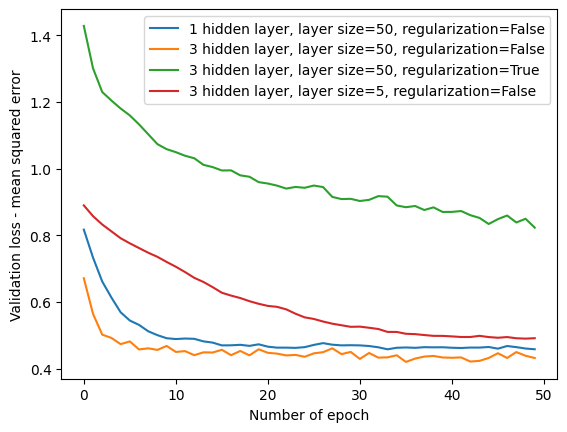

In [75]:
for i in range(len(test)):
    plt.plot(record[i], label="{} hidden layer, layer size={}, regularization={}".
            format(test[i]['number_of_layers'], 
                   test[i]['hidden_layer_size'],
                  test[i]['regularization']))

plt.legend()

plt.xlabel('Number of epoch')
plt.ylabel('Validation loss - mean squared error')

plt.show()

## Fit the final model 

In [87]:
model, history = NN_model(3, 50, False, 10)

Epoch 1/10
12/12 - 3s - loss: 0.6142 - mean_squared_error: 0.7347 - val_loss: 0.5464 - val_mean_squared_error: 0.5078 - 3s/epoch - 243ms/step
Epoch 2/10
12/12 - 0s - loss: 0.4913 - mean_squared_error: 0.4375 - val_loss: 0.5287 - val_mean_squared_error: 0.4329 - 192ms/epoch - 16ms/step
Epoch 3/10
12/12 - 0s - loss: 0.4496 - mean_squared_error: 0.3517 - val_loss: 0.5004 - val_mean_squared_error: 0.3873 - 197ms/epoch - 16ms/step
Epoch 4/10
12/12 - 0s - loss: 0.4117 - mean_squared_error: 0.3002 - val_loss: 0.4840 - val_mean_squared_error: 0.3619 - 191ms/epoch - 16ms/step
Epoch 5/10
12/12 - 0s - loss: 0.3988 - mean_squared_error: 0.2860 - val_loss: 0.4788 - val_mean_squared_error: 0.3511 - 174ms/epoch - 14ms/step
Epoch 6/10
12/12 - 0s - loss: 0.3879 - mean_squared_error: 0.2772 - val_loss: 0.4760 - val_mean_squared_error: 0.3485 - 181ms/epoch - 15ms/step
Epoch 7/10
12/12 - 0s - loss: 0.3794 - mean_squared_error: 0.2652 - val_loss: 0.4631 - val_mean_squared_error: 0.3354 - 166ms/epoch - 14ms

In [88]:
train_y_predict = model.predict(train_x)
validation_y_predict = model.predict(validation_x)

3/3 [==============================] - 0s 6ms/step


In [89]:
#Saving the training and validation results
savetxt('NN_train_y_predict.csv', train_y_predict, delimiter=',')
savetxt('NN_validation_y_predict.csv', validation_y_predict, delimiter=',')

In [90]:
npz = np.load('CN_data_test.npz', allow_pickle=True)
CN_test_x = npz['inputs'].astype(float)
CN_test_y = npz['targets'].astype(float)

In [91]:
CN_test_y_predict = model.predict(CN_test_x)

6/6 [==============================] - 0s 6ms/step


In [92]:
savetxt('NN_CN_test_y_predict.csv', CN_test_y_predict, delimiter=',')